In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
data = pd.read_csv("gc.csv", encoding="latin1")

In [120]:
df = data[["gender", "description"]]

In [121]:
df

,gender,description
0,male,i sing my own rhythm.
1,male,I'm the author of novels filled with family dr...
2,male,louis whining and squealing and all
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
...,...,...
20045,female,(rp)
20046,male,"Whatever you like, it's not a problem at all. ..."
20047,male,#TeamBarcelona ..You look lost so you should f...
20048,female,Anti-statist; I homeschool my kids. Aspiring t...


In [122]:
df.gender.value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [123]:
df.isnull().sum()

gender           97
description    3744
dtype: int64

In [124]:
df.dropna(inplace=True)

C:\Anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [125]:
df.isnull().sum()

gender         0
description    0
dtype: int64

In [126]:
df.gender.value_counts()

female     5725
male       5469
brand      4328
unknown     702
Name: gender, dtype: int64

In [127]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["sex"]= label_encoder.fit_transform(df["gender"]) 

C:\Anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [128]:
df

,gender,description,sex
0,male,i sing my own rhythm.,2
1,male,I'm the author of novels filled with family dr...,2
2,male,louis whining and squealing and all,2
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",2
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,1
...,...,...,...
20045,female,(rp),1
20046,male,"Whatever you like, it's not a problem at all. ...",2
20047,male,#TeamBarcelona ..You look lost so you should f...,2
20048,female,Anti-statist; I homeschool my kids. Aspiring t...,1


In [129]:
df.sex.value_counts()

1    5725
2    5469
0    4328
3     702
Name: sex, dtype: int64

In [130]:
import re
first_description = df.description[4]
description = re.sub("[^a-zA-Z]"," ",first_description)
description = description.lower() 

In [131]:
import nltk

In [132]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ma616\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ma616\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [133]:
from nltk.corpus import stopwords

In [134]:
description = nltk.word_tokenize(description)

In [135]:
description = [ word for word in description if not word in set(stopwords.words("english"))]

In [136]:
description

['ricky',
 'wilson',
 'best',
 'frontman',
 'kaiser',
 'chiefs',
 'best',
 'band',
 'xxxx',
 'thank',
 'kaiser',
 'chiefs',
 'incredible',
 'year',
 'gigs',
 'memories',
 'cherish',
 'always',
 'xxxxxxx']

In [137]:
import nltk as nlp
nltk.download('wordnet')
lemma = nlp.WordNetLemmatizer()
description = [ lemma.lemmatize(word) for word in description] 

description = " ".join(description)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ma616\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [138]:
description

'ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx'

In [139]:
description_list = []
for description in df.description:
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()   # buyuk harftan kucuk harfe cevirme
    description = nltk.word_tokenize(description)
    #description = [ word for word in description if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)

In [140]:
from sklearn.feature_extraction.text import CountVectorizer # bag of words yaratmak icin kullandigim metot
max_features = 5000

count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()  # x

print("en sik kullanilan {} kelimeler: {}".format(max_features,count_vectorizer.get_feature_names()))

en sik kullanilan 5000 kelimeler: ['aa', 'aaron', 'abc', 'aberdeen', 'ability', 'able', 'absolute', 'absolutely', 'absurdity', 'abuse', 'ac', 'academia', 'academic', 'academy', 'acc', 'accept', 'accepted', 'accepting', 'access', 'accessible', 'accessory', 'accident', 'accommodation', 'accomplish', 'account', 'accountant', 'accounting', 'ace', 'achieve', 'act', 'acting', 'action', 'active', 'activist', 'activity', 'actor', 'actress', 'actual', 'actually', 'ad', 'adalah', 'adam', 'add', 'added', 'addict', 'addicted', 'addiction', 'addition', 'address', 'admin', 'administrator', 'admirer', 'adopted', 'adoption', 'adorable', 'adore', 'adult', 'advance', 'advanced', 'adventure', 'adventurer', 'advertising', 'advice', 'advise', 'adviser', 'advisor', 'advocacy', 'advocate', 'advocating', 'aerial', 'aerospace', 'aesthetic', 'af', 'afc', 'affair', 'affiliate', 'affiliated', 'affiliation', 'affordable', 'aficionado', 'afraid', 'africa', 'african', 'afrikaner', 'afro', 'afternoon', 'ag', 'age', '

In [141]:
y = df.iloc[:,2].values   # male or female classes
x = sparce_matrix
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)

In [142]:
df.drop("gender", axis=1, inplace=True)

C:\Anaconda3\envs\dl\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [143]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [144]:
y_pred = nb.predict(x_test)

#print("accuracy: ",nb.score(y_pred.reshape(-1,1),y_test))

In [145]:
import seaborn as sns

In [146]:
y_pred = pd.DataFrame(y_pred.reshape(-1,1))

In [147]:
df

,description,sex
0,i sing my own rhythm.,2
1,I'm the author of novels filled with family dr...,2
2,louis whining and squealing and all,2
3,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",2
4,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,1
...,...,...
20045,(rp),1
20046,"Whatever you like, it's not a problem at all. ...",2
20047,#TeamBarcelona ..You look lost so you should f...,2
20048,Anti-statist; I homeschool my kids. Aspiring t...,1


In [149]:
y_pred

,0
0,0
1,1
2,3
3,3
4,0
...,...
1618,1
1619,2
1620,0
1621,1


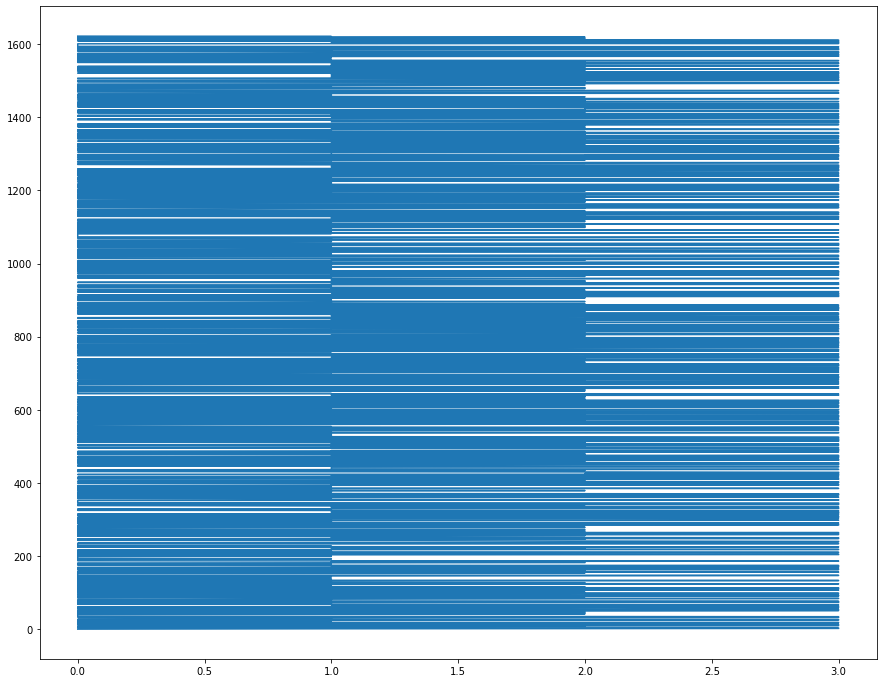

In [150]:
plt.figure(figsize=(15,12))
plt.plot(y_pred.iloc[:,0], y_pred.index)